In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def get_stats():
    mean_rmse, ste_rmse, med_rmse = list(), list(), list()
    rmse_dist = dict()
    for d in range(1, 21): # from 1 to 10 d
        df = pd.read_csv('../performance/nv_errors_' + str(d) + 'd.tsv',
                         header=None, sep='\t', names=['uid', 'bid', 'err', 'abs_err'])
        
        usr_grps = df.groupby('uid')
        rmse = usr_grps.apply(lambda gp: np.sqrt(np.power(gp['err'], 2).mean()))
        rmse_dist[d] = rmse
        
        mean_rmse.append(np.mean(rmse))
        med_rmse.append(np.median(rmse))
        ste_rmse.append(np.std(rmse) / np.sqrt(len(rmse)))
    return pd.Series(mean_rmse), pd.Series(ste_rmse), pd.Series(med_rmse), rmse_dist

In [3]:
mean_rmse, ste_rmse, med_rmse, rmse_dist = get_stats()

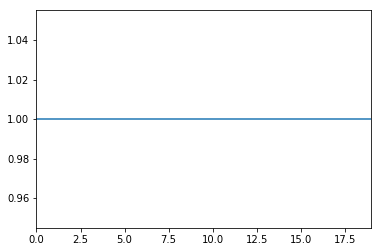

In [4]:
med_rmse.plot()

<Container object of 3 artists>

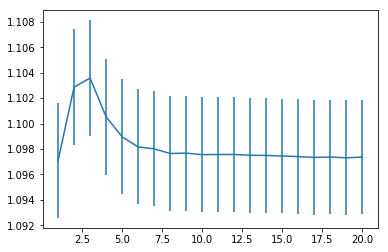

In [6]:
plt.errorbar(x=range(1, 21), y=mean_rmse, yerr=ste_rmse)

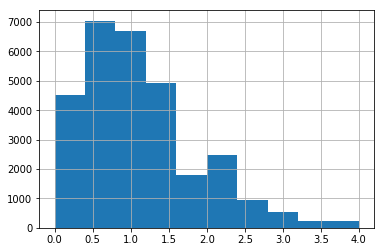

In [8]:
rmse_dist[1].hist()

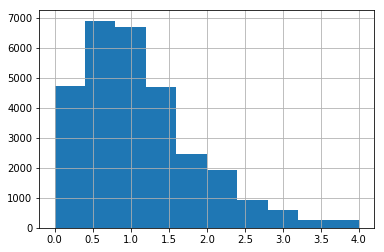

In [10]:
rmse_dist[2].hist()

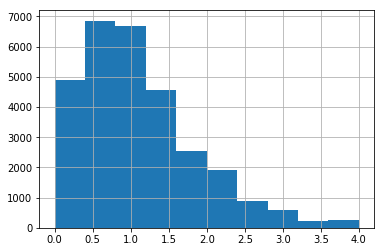

In [12]:
rmse_dist[7].hist()

In [2]:
baseline_result = pd.read_csv('../performance/nv_errors_baseline.tsv', sep='\t', header=None,
                             names=['uid', 'bid', 'err', 'abs_err'])

In [3]:
baseline_rmse = baseline_result.groupby('uid').apply(lambda gp: np.sqrt(np.power(gp['err'], 2).mean()))

In [4]:
baseline_rmse.median()

0.92545

In [12]:
baseline_rmse.mean()

1.1203891229662746

In [15]:
baseline_rmse.std() / np.sqrt(len(baseline_rmse))

0.0042530787976195325

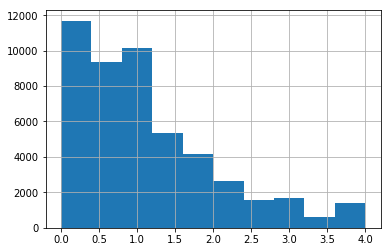

In [13]:
baseline_rmse.hist()